# Importieren von Bibliotheken

In [2]:
#https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
np.set_printoptions(suppress=True)
import folium
import geopandas as gpd
%matplotlib inline

## Daten Hochladen

In [22]:
data_ = pd.read_csv('King_County_House_prices_dataset.csv')
state_geo='/Users/younesiferd/Desktop/data/us-zip-code-latitude-and-longitude.geojson'
geo_data= gpd.read_file(state_geo)[["zip","city"]]
geo_data['zip'] = geo_data.zip.astype(int)
data=pd.merge(data_,geo_data, how='left', left_on="zipcode", right_on="zip")

In [23]:
#geo_data.info()

# Daten aufbereiten

In [24]:
#data.groupby('yr_renovated').count()

In [25]:
np.set_printoptions(suppress=True)


In [26]:
#data['yr_renovated']=data.waterfront.astype('datetime64[ns]')
data['waterfront']=data.waterfront.astype('category')
data['view']=data.view.astype('category')
data['condition']=data.condition.astype('category')
data['grade']=data.grade.astype('category')
def f1(x):
    if x==0:
        return 'No'
    else:
        return 'Yes'
def f2(x):
    if x==0:
        return 'very bad'
    elif x==1:
        return 'bad'
    elif x==2:
        return 'medium'
    elif x==3:
        return 'good'
    elif x==4:
        return "very good"
def f3(x):
    if x==1:
        return 'very bad'
    elif x==2:
        return 'bad'
    elif x==3:
        return 'medium'
    elif x==4:
        return 'good'
    elif x==5:
        return "very good"
    
def f4(x):
    if x==3:
        return 'very bad'
    elif x>3 and x<=6:
        return 'bad'
    elif x>6 and x<=10:
        return 'medium'
    elif x>10:
        return 'good'
data['waterfront_category']=data['waterfront'].apply(f1)
data['view_category']=data['view'].apply(f2)
data['condition_category']=data['condition'].apply(f3)
data['grade_category']=data['grade'].apply(f4)
#data.info( )


## count missing in the data

In [27]:
data_missing= data.isna()
#data_missing.sum()
#data_missing.sum()/len(data)

# Visualization

[Text(0, 0, 'Seattle'),
 Text(0, 0, 'Kenmore'),
 Text(0, 0, 'Sammamish'),
 Text(0, 0, 'Redmond'),
 Text(0, 0, 'Federal Way'),
 Text(0, 0, 'Maple Valley'),
 Text(0, 0, 'Bellevue'),
 Text(0, 0, 'Duvall'),
 Text(0, 0, 'Auburn'),
 Text(0, 0, 'Mercer Island'),
 Text(0, 0, 'Kent'),
 Text(0, 0, 'Issaquah'),
 Text(0, 0, 'Renton'),
 Text(0, 0, 'Vashon'),
 Text(0, 0, 'Kirkland'),
 Text(0, 0, 'Black Diamond'),
 Text(0, 0, 'North Bend'),
 Text(0, 0, 'Snoqualmie'),
 Text(0, 0, 'Enumclaw'),
 Text(0, 0, 'Fall City'),
 Text(0, 0, 'Bothell'),
 Text(0, 0, 'Woodinville'),
 Text(0, 0, 'Carnation'),
 Text(0, 0, 'Medina')]

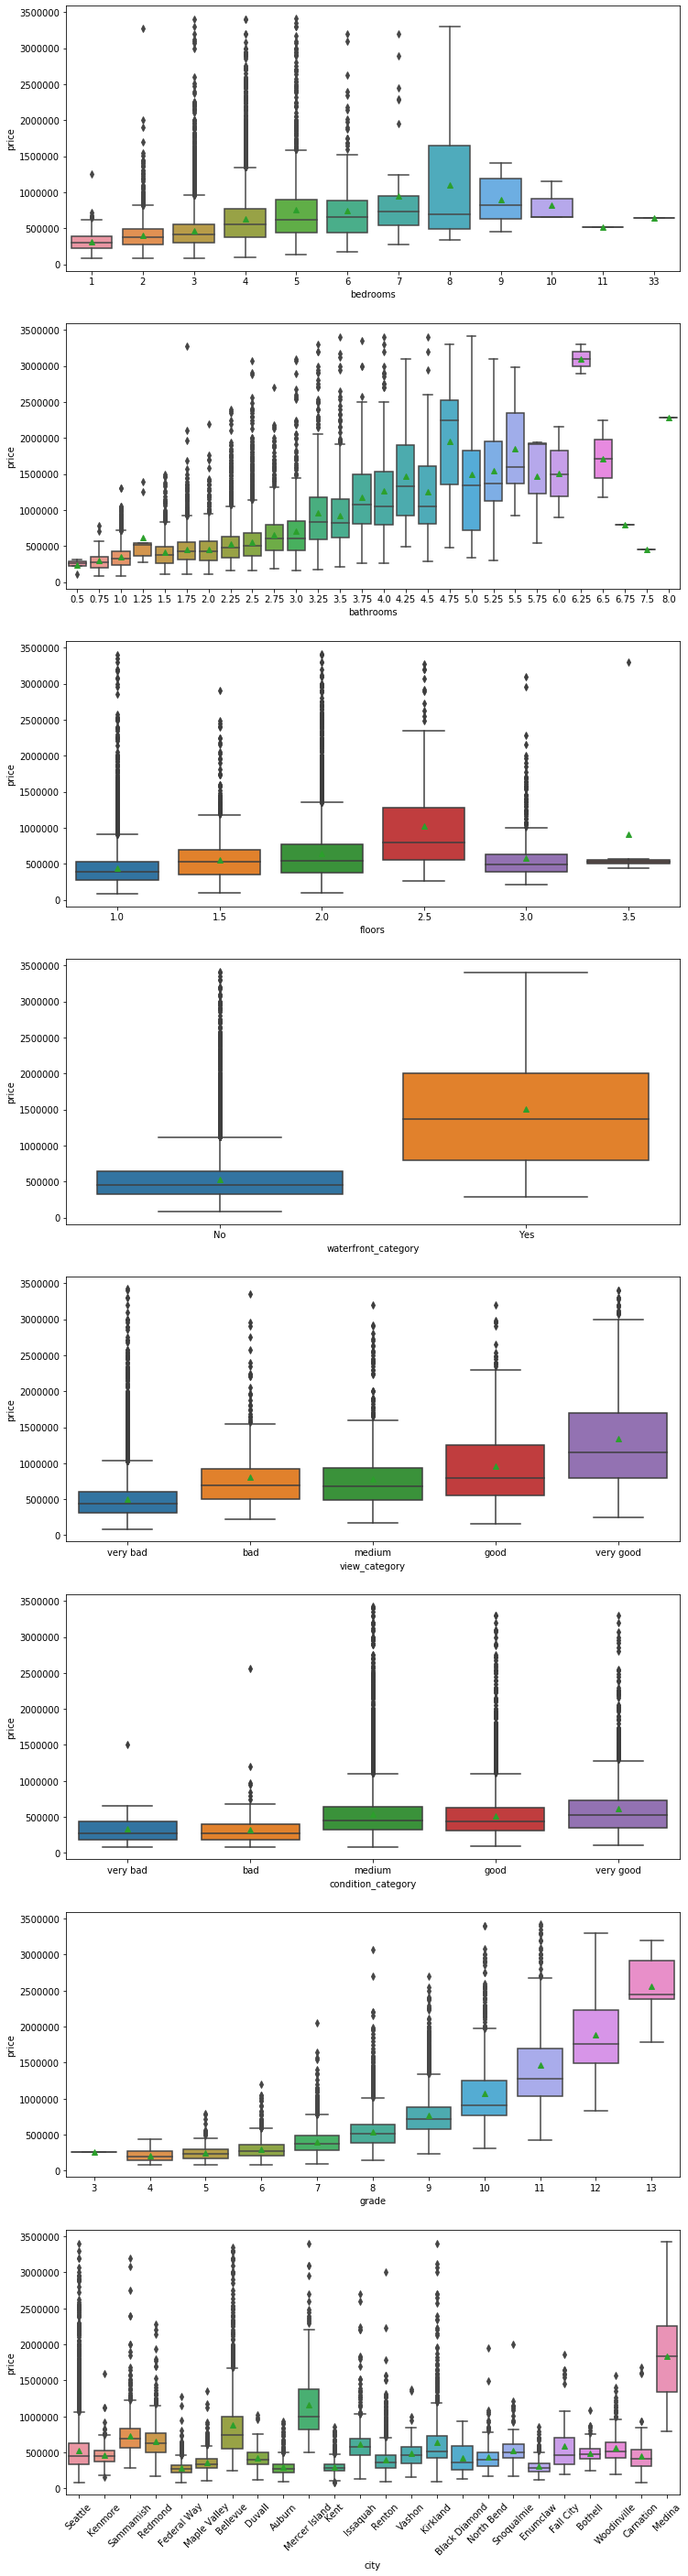

In [28]:
data=data.query("price<3500000")
fig,ax = plt.subplots(8, figsize=(12,50))
sns.boxplot(x='bedrooms', y="price", data=data, showmeans = True, ax=ax[0])
sns.boxplot(x='bathrooms', y="price", data=data, ax=ax[1], showmeans = True)
sns.boxplot(x='floors', y="price", data=data, ax=ax[2], showmeans = True)
sns.boxplot(x='waterfront_category', y="price", data=data, ax=ax[3], showmeans = True)
sns.boxplot(x='view_category', y="price", data=data, ax=ax[4], showmeans = True)
sns.boxplot(x='condition_category', y="price", data=data, ax=ax[5], showmeans = True)
sns.boxplot(x='grade', y="price", data=data, showmeans = True, ax=ax[6])
chart=sns.boxplot(x='city', y="price", data=data, showmeans = True, ax=ax[7])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        


* almost all of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price
* The prices are particularly high in Medina, since with an average per capita income of USD 81,742 it is considered extremely wealthy.
* Auburn is home to a number of major companies including Northwest Territorial Mint, ZONES, Toysmith, Timberland Homes, POE construction, Armstrong Construction, Miles Sand and Gravel, Oak Harbor Freight Lines


In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "names", y = "values", ax=ax, data=df)

TypeError: 'AxesSubplot' object does not support indexing

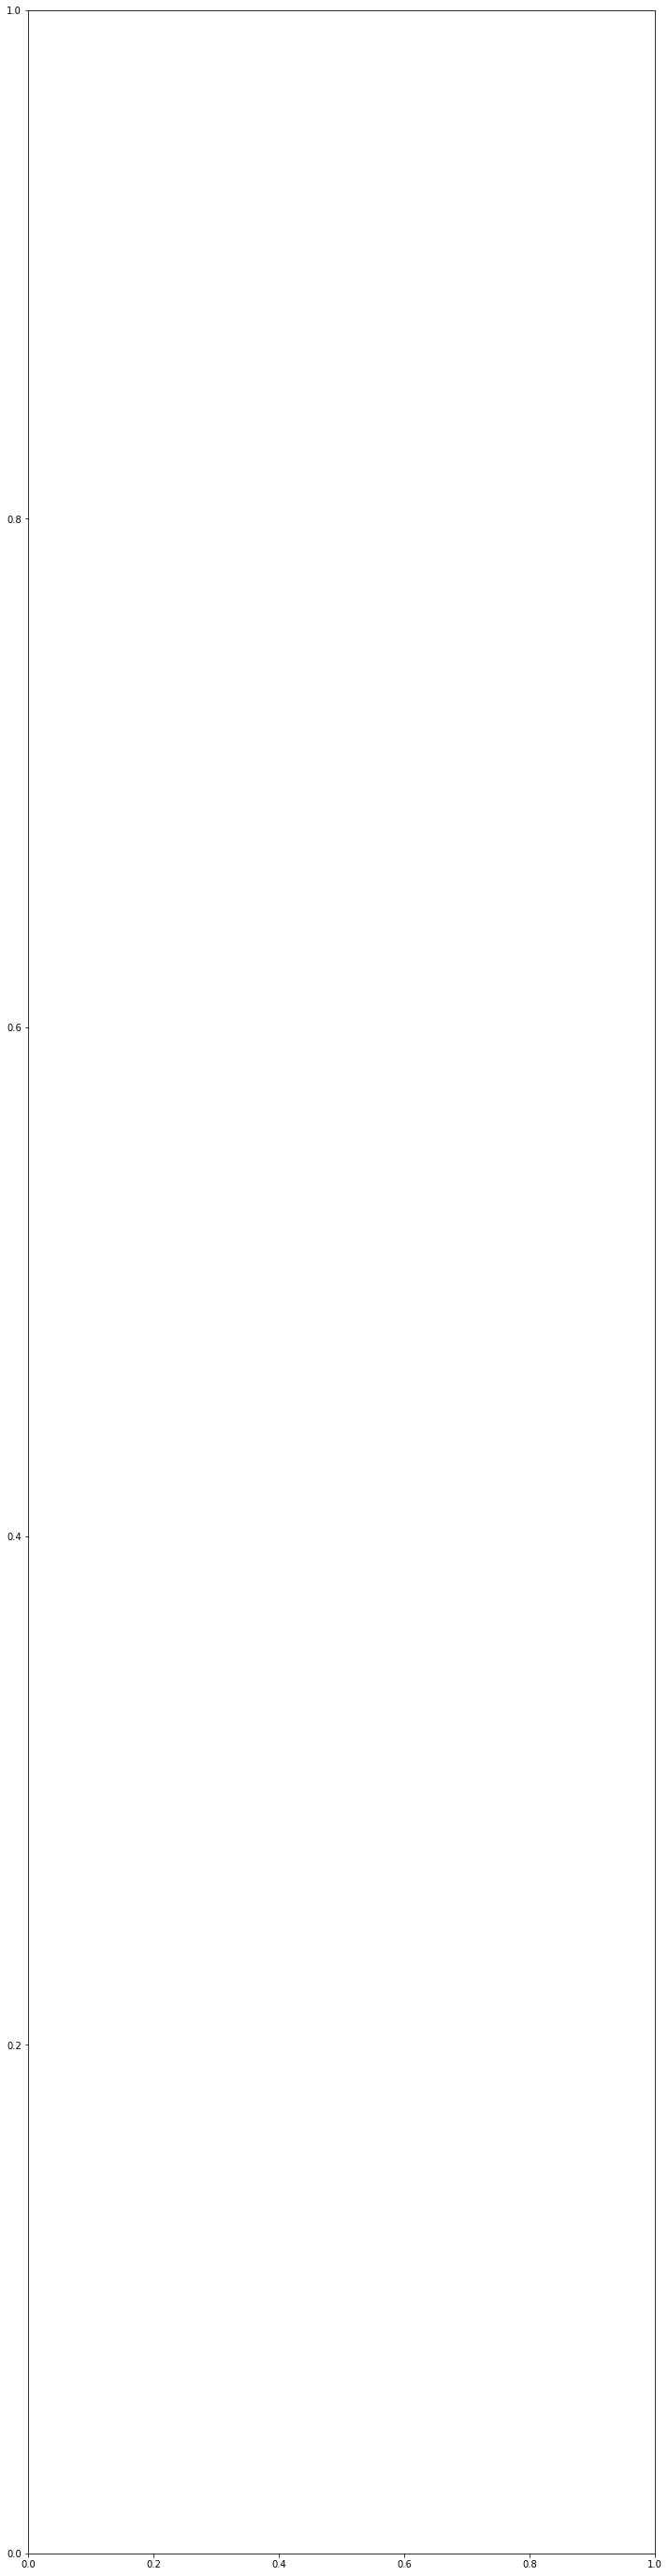

In [42]:
fig,ax= plt.subplots(figsize=(12,50))
sns.relplot(x="price", y="sqft_above",hue="city",ax=ax[0],data=data);



/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


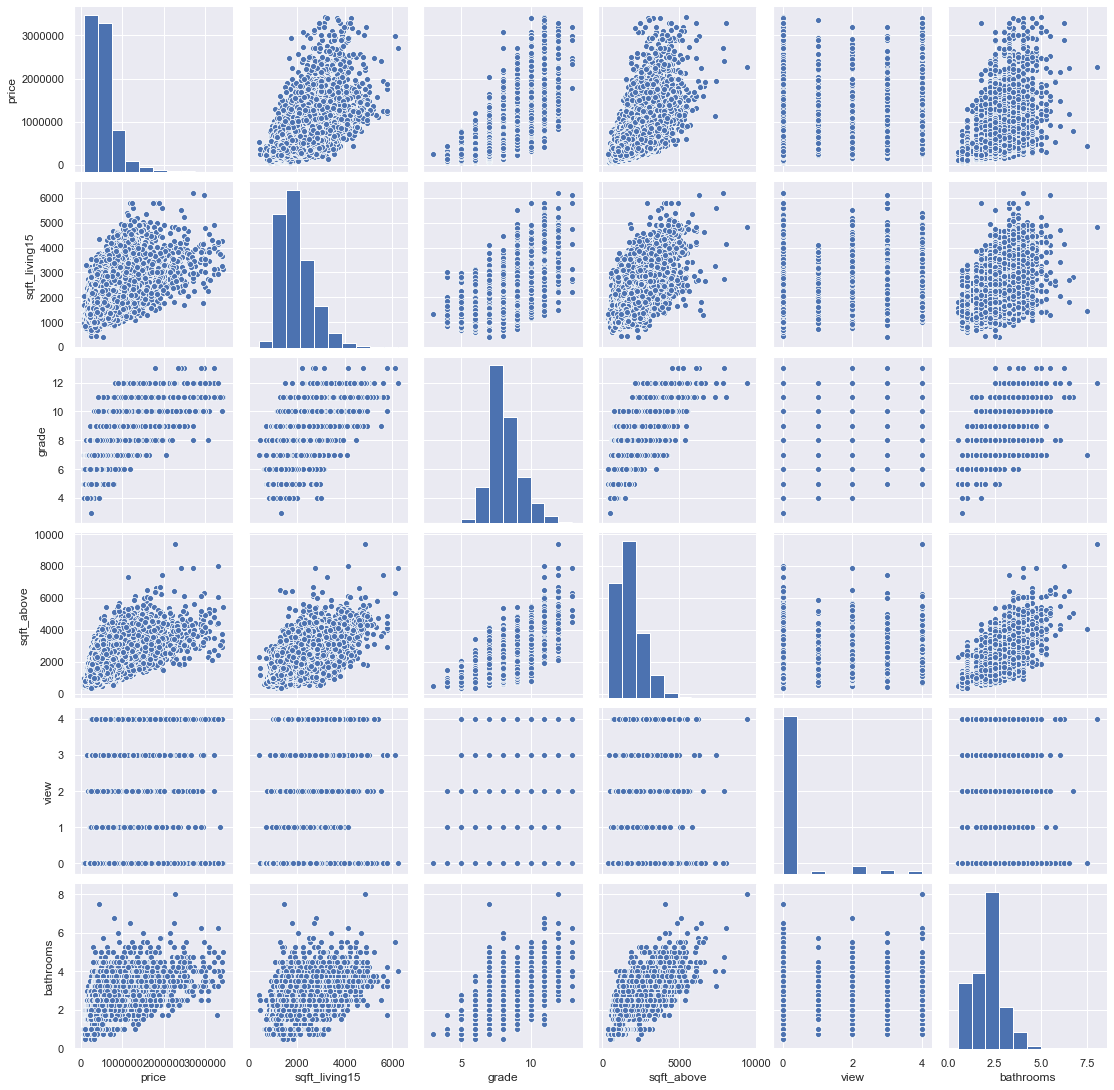

In [101]:
sns.set()
cols = ['price', 'sqft_living15', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [104]:
data[['latitude','longitude','long','lat']]

,latitude,longitude,long,lat
0,47.497971,-122.246640,-122.257,47.5112
1,47.716648,-122.303080,-122.319,47.7210
2,47.752870,-122.247360,-122.233,47.7379
3,47.538887,-122.388030,-122.393,47.5208
4,47.625364,-122.045347,-122.045,47.6168
5,47.640972,-122.033180,-122.005,47.6561
6,47.311072,-122.311880,-122.327,47.3097
7,47.397521,-122.315000,-122.315,47.4095
8,47.501753,-122.356880,-122.337,47.5123
9,47.381989,-122.035530,-122.031,47.3684


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21575 entries, 0 to 21596
Data columns (total 27 columns):
id                     21575 non-null int64
date                   21575 non-null object
price                  21575 non-null float64
bedrooms               21575 non-null int64
bathrooms              21575 non-null float64
sqft_living            21575 non-null int64
sqft_lot               21575 non-null int64
floors                 21575 non-null float64
waterfront             19199 non-null category
view                   21513 non-null category
condition              21575 non-null category
grade                  21575 non-null category
sqft_above             21575 non-null int64
sqft_basement          21575 non-null object
yr_built               21575 non-null int64
yr_renovated           17734 non-null float64
zipcode                21575 non-null int64
lat                    21575 non-null float64
long                   21575 non-null float64
sqft_living15          21575 